In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.io import loadmat

import nept
import hypertools as hyp

/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac

In [2]:
# Modify if you have different file structure or want to use different file.
data_path = os.path.join(os.path.abspath('../..'), 'MotivationalT')
data_folder_42 = os.path.join(data_path, 'R042', 'R042-2013-08-18')
data_folder_64 = os.path.join(data_path, 'R064', 'R064-2015-04-20')

# load the info file, which contains experiment-specific information
sys.path.append(data_folder_42)
sys.path.append(data_folder_64)
import r042d3 as info_42
import r064d3 as info_64

# Load spikes (.t and ._t) from this experiment
spikes_42 = nept.load_spikes(data_folder_42)
spikes_64 = nept.load_spikes(data_folder_64)

In [3]:
# Construct binned spikes (Q-matrix) using on-track data.
on_track_start_42 = info_42.task_times['on_track'].time[0, 0]
on_track_end_42 = info_42.task_times['on_track'].time[0, 1]
binsize = 0.025

binned_spikes_42 = nept.utils.bin_spikes(spikes_42, [on_track_start_42, on_track_end_42], binsize, gaussian_std=2, normalized=True)
print(binned_spikes_42.data.shape)

(96199, 107)


In [4]:
# Find left and right trials
left_epochs_42 = info_42.experiment_times['left_trials'].time
right_epochs_42 = info_42.experiment_times['right_trials'].time

left_b_spikes_42 = binned_spikes_42.time_slice(left_epochs_42[:, 0], left_epochs_42[:, 1])
right_b_spikes_42 = binned_spikes_42.time_slice(right_epochs_42[:, 0], right_epochs_42[:, 1])

print(left_b_spikes_42.data.shape)
print(right_b_spikes_42.data.shape)

(7460, 107)
(9312, 107)


In [5]:
# Find the smallest trial interval for both left and right trials
epochs_42 = np.concatenate((left_epochs_42, right_epochs_42), axis=0)
min_interval_42 = min(epochs_42[:, 1] - epochs_42[:, 0])

left_b_spikes_trunc_42 = binned_spikes_42.time_slice((left_epochs_42[:, 1] - min_interval_42), left_epochs_42[:, 1])
right_b_spikes_trunc_42 = binned_spikes_42.time_slice((right_epochs_42[:, 1] - min_interval_42), right_epochs_42[:, 1])

print(left_b_spikes_trunc_42.data.shape)
print(right_b_spikes_trunc_42.data.shape)

(3888, 107)
(3888, 107)


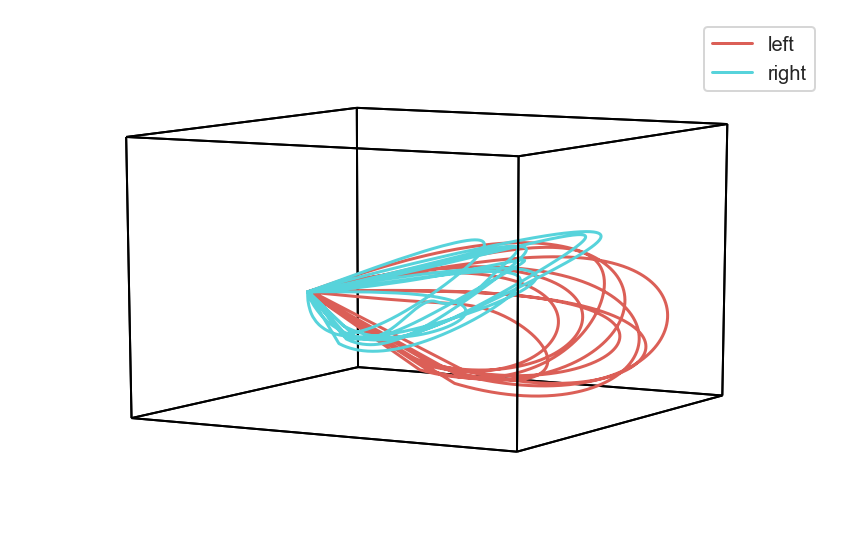

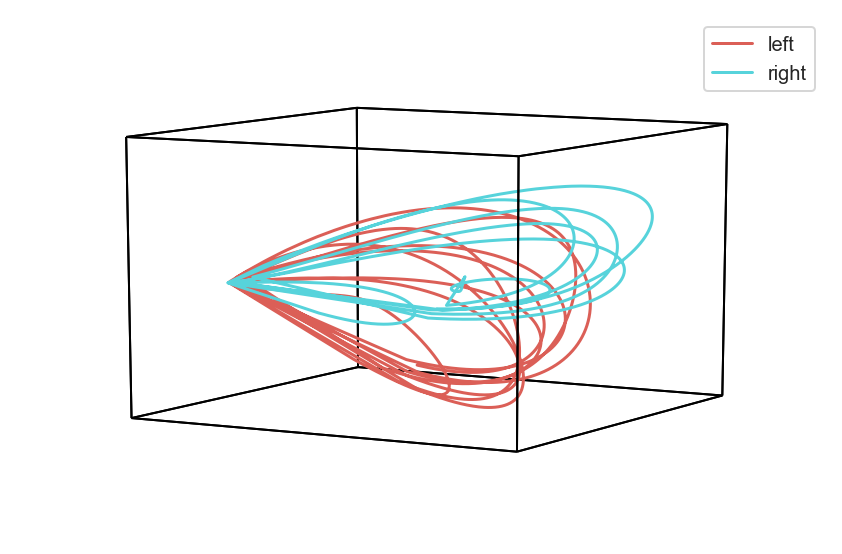

In [6]:
# Plot binned_spikes for left and right trials
geo = hyp.plot([left_b_spikes_42.data, right_b_spikes_42.data], legend=['left', 'right'])

# Plot binned_spikes for truncated left and right trials
geo = hyp.plot([left_b_spikes_trunc_42.data, right_b_spikes_trunc_42.data], legend=['left', 'right'])

In [7]:
# Construct binned spikes (Q-matrix) using on-track data.
on_track_start_64 = info_64.task_times['on_track'].time[0, 0]
on_track_end_64 = info_64.task_times['on_track'].time[0, 1]
binsize = 0.025

binned_spikes_64 = nept.utils.bin_spikes(spikes_64, [on_track_start_64, on_track_end_64], binsize, gaussian_std=2, normalized=True)
keep_indices = np.argsort(np.sum(binned_spikes_64.data, axis = 0))[9:]
binned_spikes_64.data = binned_spikes_64.data[:, keep_indices]

print(binned_spikes_64.data.shape)

(96419, 107)


In [8]:
# Find left and right trials
left_epochs_64 = info_64.experiment_times['left_trials'].time
right_epochs_64 = info_64.experiment_times['right_trials'].time

left_b_spikes_64 = binned_spikes_64.time_slice(left_epochs_64[:, 0], left_epochs_64[:, 1])
right_b_spikes_64 = binned_spikes_64.time_slice(right_epochs_64[:, 0], right_epochs_64[:, 1])

print(left_b_spikes_64.data.shape)
print(right_b_spikes_64.data.shape)

(6884, 107)
(4636, 107)


In [9]:
# Find the smallest trial interval for both left and right trials
epochs_64 = np.concatenate((left_epochs_64, right_epochs_64), axis=0)
min_interval_64 = min(epochs_64[:, 1] - epochs_64[:, 0])

left_b_spikes_trunc_64 = binned_spikes_64.time_slice((left_epochs_64[:, 1] - min_interval_64), left_epochs_64[:, 1])
right_b_spikes_trunc_64 = binned_spikes_64.time_slice((right_epochs_64[:, 1] - min_interval_64), right_epochs_64[:, 1])

print(left_b_spikes_trunc_64.data.shape)
print(right_b_spikes_trunc_64.data.shape)

(2580, 107)
(1204, 107)


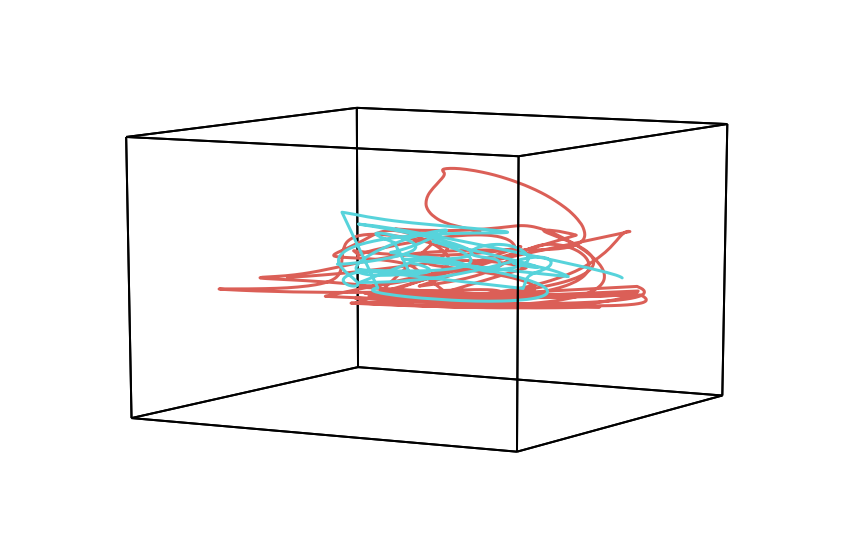

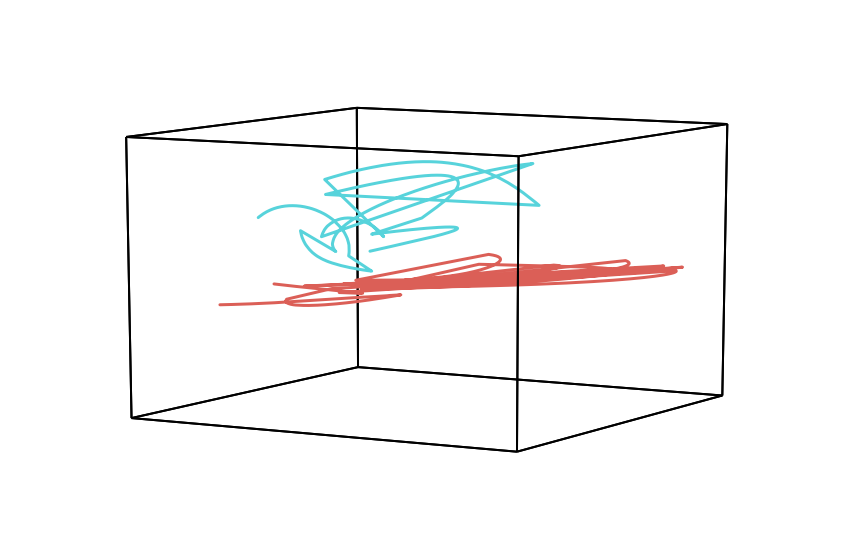

In [10]:
# Plot binned_spikes for left and right trials
geo = hyp.plot([left_b_spikes_64.data, right_b_spikes_64.data])

# Plot binned_spikes for truncated left and right trials
geo = hyp.plot([left_b_spikes_trunc_64.data, right_b_spikes_trunc_64.data])

In [ ]:
(aligned_left_trunc_42, proj_matrix_42) = hyp.tools.procrustes(left_b_spikes_trunc_42.data, right_b_spikes_trunc_42.data)

trunc_64 = np.asmatrix(right_b_spikes_trunc_42.data)
# Do projection
aligned_trunc_64 = (trunc_64 * proj_matrix_42).A

# Plot binned_spikes for truncated left and right trials
geo = hyp.plot([aligned_trunc_64, left_b_spikes_trunc_64.data, right_b_spikes_trunc_64.data], legend=['aligned', 'left', 'right'])

In [ ]:
geo = hyp.plot([left_b_spikes_trunc_42.data,
                right_b_spikes_trunc_42.data,
                left_b_spikes_trunc_64.data,
                right_b_spikes_trunc_64.data],
                legend=['left_42', 'right_42', 'left_64', 'right_64'],
                align='SRM')

In [26]:
average_42 = loadmat('../sub42.mat')
average_44 = loadmat('../sub44.mat')
average_64 = loadmat('../sub64.mat')

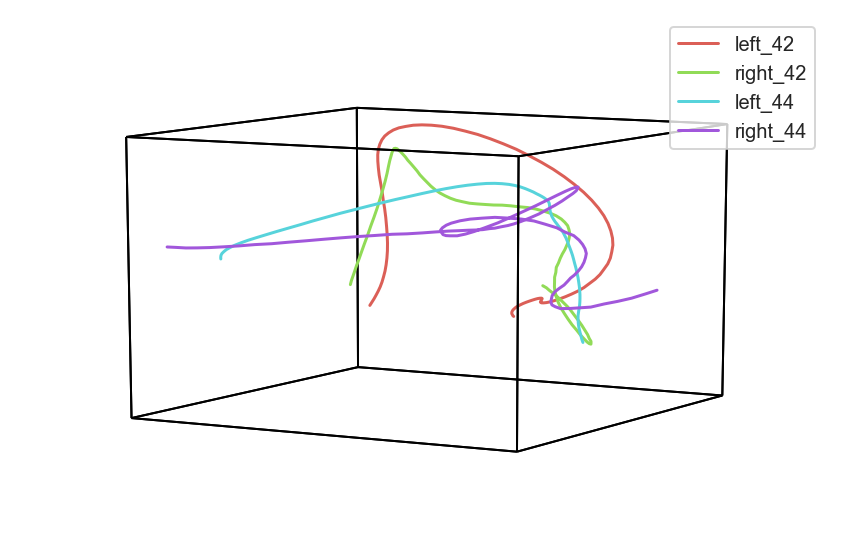

In [37]:
geo = hyp.plot([average_42['all_left'],
                average_42['all_right'],
                average_44['all_left'],
                average_44['all_right'],
                average_64['all_left'],
                average_64['all_right']],
                legend=['left_42', 'right_42', 'left_44', 'right_44'],
                align='hyper')